In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data as Pandas dataframe
train = pd.read_csv('/home/hemanth/Documents/DeepLearning/CNN/train_clean_titanic.csv' )
test = pd.read_csv('/home/hemanth/Documents/DeepLearning/CNN/test_clean_titanic.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [3]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [4]:
df.tail()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
413,30.0,NaN,S,0,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
414,39.0,C105,C,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Mrs
415,38.5,NaN,S,0,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
416,30.0,NaN,S,0,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr
417,4.0,NaN,C,2,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,Master


In [5]:
df.describe()

,Age,Family_Size,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.562391,0.883881,33.276193,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.165360,1.583639,51.743584,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,0.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,0.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.500000,1.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,10.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Family_Size  1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [7]:
df.isna().sum()

Age               0
Cabin          1014
Embarked          0
Family_Size       0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

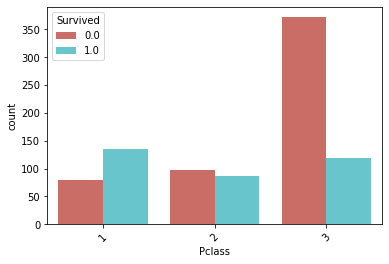

In [8]:
### Pre-processing
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


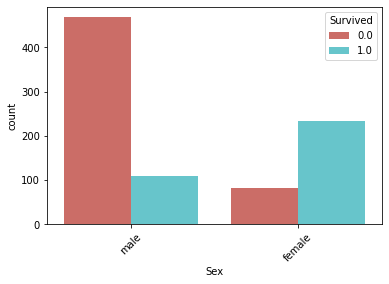

In [9]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


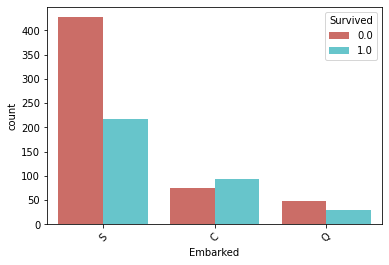

In [10]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [11]:
df.head(2)

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs


In [12]:
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [13]:
df.tail(2)

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
416,30.0,NaN,S,0,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,Mr
417,4.0,NaN,C,2,22.3583,"Peter, Master. Michael J",1,1309,3,1,1,NaN,2668,Master


In [14]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [15]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [16]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [23]:
df.isna().sum()

Age               0
Family_Size       0
Fare              0
Parch             0
Pclass            0
Sex               0
SibSp             0
Survived        418
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Dr          0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rev         0
dtype: int64

In [27]:
df['Survived']=df['Survived'].fillna(df['Survived'].mean())
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [28]:
df.isna().sum()

Age             0
Family_Size     0
Fare            0
Parch           0
Pclass          0
Sex             0
SibSp           0
Survived        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Dr        0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rev       0
dtype: int64

In [29]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import losses, optimizers
from tensorflow.keras import activations
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import plot_model


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


In [30]:
df_train=df.sample(frac=0.7,random_state=0)
df_valid=df.drop(df_train.index)
display(df_train.head(4))

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
248,29.0,1,26.0000,0,2,0,1,0.383838,0,0,1,0,0,0,0,1,0
533,35.5,2,22.3583,2,3,0,0,1.000000,1,0,0,0,0,0,0,1,0
459,30.0,0,7.7500,0,3,1,0,0.000000,0,1,0,0,0,0,1,0,0
259,21.0,0,7.7750,0,3,1,0,0.383838,0,0,1,0,0,0,1,0,0


In [31]:
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

In [32]:
x_train=df_train.drop('Survived',axis=1)
x_valid=df_valid.drop('Survived',axis=1)

y_train=df_train['Survived']
y_valid=df_valid['Survived']

In [33]:
x_train.shape

(916, 16)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stoping=EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, #how many epochs to wait before stoping
    restore_best_weights=True
)

In [35]:
model=keras.Sequential([
    layers.Dense(32,activation='relu',input_shape=[16]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
    
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [42]:
model.compile(optimizer='adam',
             loss='mae',metrics=['accuracy'])

In [43]:
df.shape

(1309, 17)

In [46]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stoping],
    verbose=1,
)

Epoch 1/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8319 - accuracy: 0.3712 - val_loss: 0.3544 - val_accuracy: 0.5514
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.8206 - accuracy: 0.3854 - val_loss: 0.3600 - val_accuracy: 0.5607
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.8550 - accuracy: 0.3723 - val_loss: 0.3668 - val_accuracy: 0.5794
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8212 - accuracy: 0.3755 - val_loss: 0.3731 - val_accuracy: 0.5888
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7755 - accuracy: 0.3679 - val_loss: 0.3757 - val_accuracy: 0.5981
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7448 - accuracy: 0.3854 - val_loss: 0.3798 - val_accuracy: 0.6075
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.7324 - accuracy: 0.3930 - val_loss: 0.3835 - val_accuracy: 0.6075
Epoch 8/1000
4/4 [=

mininum validation loss:0.3486044108867645


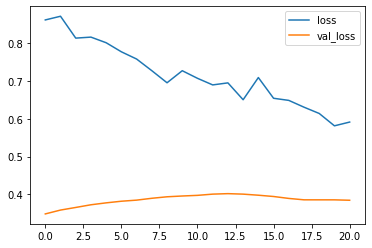

In [45]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print("mininum validation loss:{}".format(history_df['val_loss'].min()))